In the baseline model (A), each stock is ranked daily (value between 0 and 1) for its technical variables. In the updated model (B), I removed this ranking step.

The motivation for each way of constructing:

1) Baseline: results in a normalization across time, i.e. how should a stock behave relative to its peers given its relative behavior. Gets rid of temporal information like absolute volatility, etc.

2) Updated: temporal characteristics can be models, i.e. when all stocks are down 2% relative to its 6 month high, should those be treated differently than if they are down 20%?

Conclusion: change the technical variables

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [5]:
# Compare data_rank_flag
run1 = RunManager('StatArbStrategy', 'run_0103')
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,data_rank_flag,False,312,0.985199,0.080246,-999.0
1,data_rank_flag,True,312,0.827509,0.067886,-999.0
2,holding_period,3,208,0.913163,0.072212,-999.0
3,holding_period,5,208,0.923020,0.075593,-999.0
4,holding_period,7,208,0.882880,0.074394,-999.0
5,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",312,1.022097,0.086159,-999.0
6,model,{u'type': u'reg'},312,0.790611,0.061973,-999.0
7,per_side_count,10,312,1.021791,0.073534,-999.0
8,per_side_count,20,312,0.790917,0.074598,-999.0
9,response_days,10,312,0.913873,0.074062,-999.0


In [6]:
# Current drops for production environment
drop_params = [('model', "{u'type': u'reg'}"), ('score_var', 'prma_20'), ('data_rank_flag', True)]
runA = RunManager('StatArbStrategy', 'run_0103', drop_params=drop_params)

drop_params = [('model', "{u'type': u'reg'}"), ('score_var', 'prma_20'), ('data_rank_flag', False)]
runB = RunManager('StatArbStrategy', 'run_0103', drop_params=drop_params)

In [9]:
combA = CombinationSearch()
combA.set_selection_criteria('sharpe')
combA.params['training_epochs'] = 5
combA.add_run(runA)
combA.start()



  0%|          | 0/5 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...





 20%|██        | 1/5 [00:10<00:41, 10.50s/it]

 40%|████      | 2/5 [00:20<00:31, 10.40s/it]

 60%|██████    | 3/5 [00:30<00:20, 10.32s/it]

 80%|████████  | 4/5 [00:41<00:10, 10.41s/it]

100%|██████████| 5/5 [00:52<00:00, 10.63s/it]



In [10]:
combB = CombinationSearch()
combB.set_selection_criteria('sharpe')
combB.params['training_epochs'] = 5
combB.add_run(runB)
combB.start()

Reading and aggregating runs...


  0%|          | 0/5 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 5/5 [00:52<00:00, 10.42s/it]


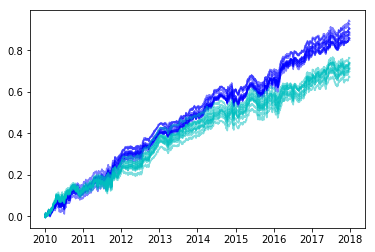

In [11]:
plt.figure()
plt.plot(combA.best_results_returns.dropna().cumsum(), 'b', alpha=0.5)
plt.plot(combB.best_results_returns.dropna().cumsum(), 'c', alpha=0.5)
plt.show()

In [12]:
get_stats(combA.best_results_returns.dropna()).mean(axis=1)

Total               0.88837
Mean                0.00042
Std                 0.00390
Skew                0.20037
Kurt                2.40100
Sharpe              1.79045
Sortino             3.25323
MinRet             -0.01983
WinP                0.54799
DD%                -0.06449
DDDays            105.20000
UnderwaterDays    113.10000
Underwater%        -0.05611
TimeAtHighs         0.17950
VaR_5perc          -0.00565
CVaR_5perc         -0.00813
LPM_2               0.00614
dtype: float64

In [13]:
get_stats(combB.best_results_returns.dropna()).mean(axis=1)

Total               0.72230
Mean                0.00038
Std                 0.00385
Skew                0.18241
Kurt                2.21700
Sharpe              1.47913
Sortino             2.65805
MinRet             -0.01855
WinP                0.53467
DD%                -0.06069
DDDays            108.60000
UnderwaterDays    147.10000
Underwater%        -0.05301
TimeAtHighs         0.14910
VaR_5perc          -0.00563
CVaR_5perc         -0.00812
LPM_2               0.00614
dtype: float64

In [14]:
dfA = rollup_returns(combA.best_results_returns.dropna())
dfA['yr'] = dfA.sum(axis=1)
dfA

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.050096,0.001315,0.079678,-0.004333,0.126757
2011,0.035081,0.031407,-0.006209,0.074419,0.134697
2012,0.037619,-0.000493,0.041206,0.062836,0.141168
2013,-0.012396,0.030885,0.034055,0.029491,0.082035
2014,0.046915,0.031891,0.000747,-0.003940,0.075614
2015,0.018860,0.038605,-0.023135,0.068113,0.102442
2016,0.074693,0.016701,0.009160,0.050288,0.150843
2017,0.024103,0.044350,-0.009361,0.032944,0.092036


In [15]:
dfB = rollup_returns(combB.best_results_returns.dropna())
dfB['yr'] = dfB.sum(axis=1)
dfB

Qtr,1,2,3,4,yr
Year,,,,,
2010,0.066874,0.018358,0.063752,-0.011792,0.137192
2011,0.031946,0.023074,-0.016235,0.083219,0.122004
2012,0.028642,0.005760,0.048388,0.079008,0.161798
2013,-0.019836,0.038832,0.031901,0.015874,0.066771
2014,0.036033,0.019015,-0.017150,0.017869,0.055767
2015,0.003472,0.056727,-0.022385,0.037958,0.075772
2016,0.021710,-0.018065,0.022785,0.041044,0.067475
2017,0.022305,0.052875,-0.015024,0.017317,0.077473
